In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 50
CHANNELS = 3

In [3]:
!unzip '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/Flower Dataset.zip'

Archive:  /content/drive/MyDrive/Data-Science Edureka/Project/Flower/Flower Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  infla

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/flowers',
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4317 files belonging to 5 classes.


In [5]:
class_name = train_ds.class_names
class_name

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

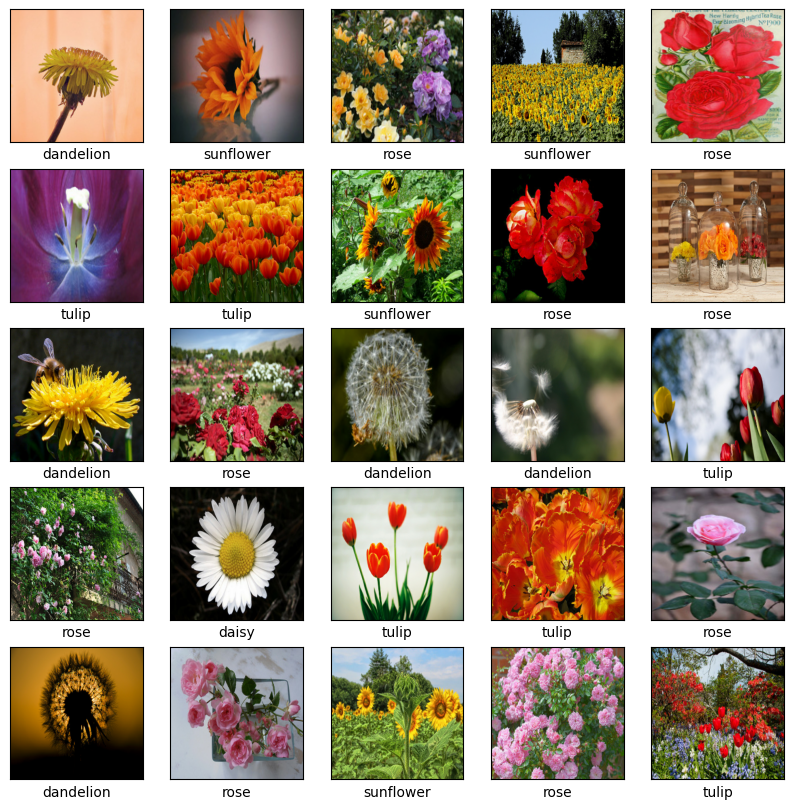

In [6]:
plt.figure(figsize = (10,10) )
for image_batch, label_batch in train_ds.take(1):
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    # plt.title(class_name[label_batch[i]])
    plt.xlabel(class_name[label_batch[i]])
    # plt.axis('off')
    plt.xticks([])
    plt.yticks([])


In [7]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [8]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

In [9]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [10]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_name)
model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape=input_shape)

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (50, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (50, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (50, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (50, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (50, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (50, 62, 62, 64)         0         
 2D)                                                  

In [12]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [13]:
history = model.fit(
    train_ds,
    epochs = 70,
    batch_size = BATCH_SIZE,
    verbose = 2
)

Epoch 1/70
87/87 - 33s - loss: 1.3400 - accuracy: 0.3991 - 33s/epoch - 376ms/step
Epoch 2/70
87/87 - 7s - loss: 1.1093 - accuracy: 0.5249 - 7s/epoch - 81ms/step
Epoch 3/70
87/87 - 7s - loss: 1.0298 - accuracy: 0.5738 - 7s/epoch - 81ms/step
Epoch 4/70
87/87 - 7s - loss: 0.9671 - accuracy: 0.6189 - 7s/epoch - 81ms/step
Epoch 5/70
87/87 - 7s - loss: 0.9361 - accuracy: 0.6298 - 7s/epoch - 82ms/step
Epoch 6/70
87/87 - 7s - loss: 0.8675 - accuracy: 0.6602 - 7s/epoch - 81ms/step
Epoch 7/70
87/87 - 7s - loss: 0.8468 - accuracy: 0.6688 - 7s/epoch - 81ms/step
Epoch 8/70
87/87 - 7s - loss: 0.8046 - accuracy: 0.6829 - 7s/epoch - 81ms/step
Epoch 9/70
87/87 - 7s - loss: 0.8000 - accuracy: 0.6864 - 7s/epoch - 82ms/step
Epoch 10/70
87/87 - 7s - loss: 0.7552 - accuracy: 0.7035 - 7s/epoch - 82ms/step
Epoch 11/70
87/87 - 7s - loss: 0.7464 - accuracy: 0.6956 - 7s/epoch - 82ms/step
Epoch 12/70
87/87 - 7s - loss: 0.7132 - accuracy: 0.7183 - 7s/epoch - 82ms/step
Epoch 13/70
87/87 - 7s - loss: 0.7114 - accura

In [ ]:
model_json = model.to_json()
with open("flower.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("flower.h5")
print("Saved model to disk")

Saved model to disk


In [14]:
'''########### Making single predictions ###########'''
import numpy as np
from tensorflow.keras.preprocessing import image
 
ImagePath = '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/rose.jpg'
test_image = image.load_img(ImagePath,target_size = (256, 256))
test_image = image.img_to_array(test_image)
 
test_image = np.expand_dims(test_image,axis=0)
 
result = model.predict(test_image,verbose=0)

# print(training_set.class_indices)
 
print('####'*10)

print(np.argmax(result))
print('Prediction is: ',class_name[np.argmax(result)])

########################################
2
Prediction is:  rose


In [15]:
'''########### Making single predictions ###########'''
import numpy as np
from tensorflow.keras.preprocessing import image
 
ImagePath = '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/tulip.jpg'
test_image = image.load_img(ImagePath,target_size = (256, 256))
test_image = image.img_to_array(test_image)
 
test_image = np.expand_dims(test_image,axis = 0)
 
result = model.predict(test_image,verbose = 0)

# print(training_set.class_indices)
 
print('####'*10)

print(np.argmax(result))
print('Prediction is: ',class_name[np.argmax(result)])

########################################
2
Prediction is:  rose


In [16]:
def model_predict(x):
  import numpy as np
  from tensorflow.keras.preprocessing import image

  ImagePath = x
  test_image = image.load_img(ImagePath,target_size = (256, 256))
  test_image = image.img_to_array(test_image)

  test_image = np.expand_dims(test_image,axis = 0)

  result = model.predict(test_image,verbose = 0)

  print('####'*10)

  return class_name[np.argmax(result)]

In [ ]:
testing = ['/content/drive/MyDrive/Data-Science Edureka/Project/Flower/daisy.jpeg',
           '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/rose.jpg',
           '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/sunflower.jpeg',
           '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/dandelion.jpg',
           '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/IMG20230328201602.jpg',
           '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/tulip.jpg',
           '/content/drive/MyDrive/Data-Science Edureka/Project/Flower/red-roses.jpg']
           
for i in testing:
  print(model_predict(i))

########################################
daisy
########################################
rose
########################################
sunflower
########################################
dandelion
########################################
rose
########################################
tulip
########################################
rose
